**Prepare rules for the all the data sets** <br>
1) Try different values of support and confidence. Observe the change in number of rules for different support, confidence values <br>
2) Change the minimum length in apriori algorithm <br>
3) Visulize the obtained rules using different plots 

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

#### Load dataset

In [2]:
movie = pd.read_csv('my_movies.csv')

In [3]:
movie.head(5)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
movie_df = movie.iloc[:, 5:]

#### EDA on dataset

In [5]:
# Check first 5 records
movie_df.head(5)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [6]:
# Check last 5 records
movie_df.tail(5)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [7]:
# Check for data types, non-null values & memory usage
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [8]:
# Check for data types, non-null values & memory usage
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [9]:
# Check for the column labels of the DataFrame
movie_df.columns

Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')

In [10]:
# Check the dimensions of the DataFrame
movie_df.shape

(10, 10)

In [11]:
# Check for the random sample from the DataFrame
movie_df.sample(5)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,1,1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1
8,1,1,0,0,1,0,0,0,0,0


In [12]:
frequent_itemsets = apriori(movie_df, min_support = 0.005, max_len = 3, use_colnames = True)

frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'support')

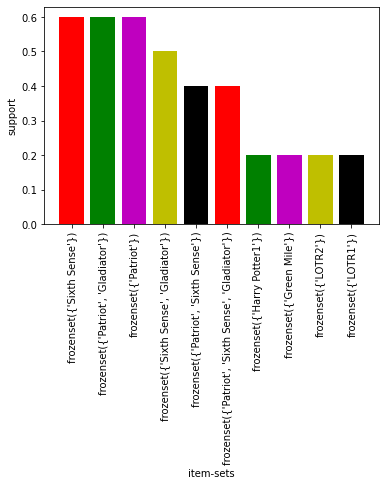

In [13]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
plt.bar(x = list(range(1, 11)), height = frequent_itemsets.support[1:11], color = 'rgmyk')
plt.xticks(list(range(1, 11)), frequent_itemsets.itemsets[1:11], rotation = 90)
plt.xlabel('item-sets');plt.ylabel('support')

In [14]:
# Declaring rules variable for association rule
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False, inplace = True)

In [15]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))

In [16]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
38,"(LOTR2, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
12,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
92,"(LOTR, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
48,"(Harry Potter1, Green Mile)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
34,"(Sixth Sense, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
123,(LOTR2),"(Harry Potter1, Green Mile)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
86,"(LOTR2, Green Mile)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
73,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
19,(Harry Potter1),"(LOTR2, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
